# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import csv
import nltk
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
import joblib
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import pos_tag 
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.classify.scikitlearn import SklearnClassifier
from textblob import TextBlob
from bs4 import BeautifulSoup

import pickle
import re, string
from collections import Counter
from string import punctuation
import tweepy
from tweepy import OAuthHandler
import json
from wordcloud import WordCloud

import plotly
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()

from IPython.display import IFrame
import folium
from folium import plugins
from folium.plugins import MarkerCluster, FastMarkerCluster, HeatMapWithTime


pd.set_option('display.max_colwidth', 1)
plt.style.use('seaborn-white')

# Process the train data

In [2]:
#label 0-negative, 2-means positive, 4-neutral
data = pd.read_excel("AIA-finalized.xlsx",skip_blank_lines=True,encoding = "latin") 
data

,date,month,year,username,tweet,language
0,2020-10-31,2020-10-01,2020,hire_pay,HDFC Bank @ Payroll of Tata Aia Life Insurance/Â 3.50L https://t.co/FwFGfKXxq6,ro
1,2020-10-31,2020-10-01,2020,_net_insurance,Tutti sintonizzati alle 15.00 per l'anticipo della VI giornata di #campionato che ci accompagnerÃ lungo tutto weekend con la @SerieA #netinsurance e @AIA_it scendono insieme negli stadi di tutta l'Italia calcistica: si chiude il turno lunedÃ¬ alle 20.45 con il posticipo @FIGC https://t.co/Nhibe4V2Cd,it
2,2020-10-31,2020-10-01,2020,igorkondratev,"Aia motor insurance singapore Insurance for Expats, Medical, Health, Travel, Motor InsuranceÂ Singapore https://t.co/gSI2HhFMCB",en
3,2020-10-31,2020-10-01,2020,gcservices3,Advantages of being associated with Tata AIA Life Insurance: âœ… Driven by a Brand philosophy of Rakshakaran âœ… Claim settlement ratio of 99.06%* in 2019-20 âœ… AON Best Employerâ€™s Award for 4 years in a row âœ… Among the Leading Life Insurance Companies https://t.co/9AFu5pIZ0v,en
4,2020-10-31,2020-10-01,2020,hire_pay,Hiring for TATA AIA Life insurance /BANCA/CAMÂ @7892476932 https://t.co/ChZZqJTCjH,en
...,...,...,...,...,...,...
49518,2017-01-02,2017-01-01,2017,fed_marchi,#sport #calcio #arbitri #FIFA #AIA https://t.co/aWPlB182qq,und
49519,2017-01-01,2017-01-01,2017,coachkylespeer,John 1:1 #FCA #AIA,en
49520,2017-01-01,2017-01-01,2017,twt_presint18,@omgitsZapein @adamghazali Gambar tu bley jual kat #AIA,in
49521,2017-01-01,2017-01-01,2017,blairdavies1,"One small step for architects, on huuuge step for mankind #oaa #aia #architecturematters https://t.co/48qwygi6ss",en


In [3]:
data = data.dropna()

In [4]:
data.isnull().values.any()

False

# Natural Language Processing (NLP)

###### Preprocessing 1:  Clean tweet text by removing links, special characters

In [5]:
def text_cleaning(tweet):
    tweet = tweet.lower() # convert text to lower-case
    tweet = re.sub(r'\&\w*;', '',tweet) # remove HTML special entities (e.g. &amp;)
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', tweet) # remove URLs
    tweet = re.sub('@[^\s]+', 'AT_USER', tweet) # remove usernames
    tweet = re.sub(r'\$\w*', '', tweet) # remove tickers
    tweet = re.sub(r'#\w*', '', tweet) # remove hashtags
    tweet = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', tweet)  # remove punctuation
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet) # remove hyperlinks
    tweet = tweet.lstrip(' ') # remove single space remaining at the front of the tweet.
    tweet = re.sub(r'\s\s+', ' ', tweet) # remove whitespace (including new line characters) 
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet) # remove words with 2 or fewer letters 
    tweet = tweet.lstrip(' ') # remove single space remaining at the front of the tweet.
  
    # remove characters beyond Basic Multilingual Plane (BMP) of unicode (contains characters for almost all modern languages, and a large number of symbols):
    tweet = ''.join(c for c in tweet if c <= '\uFFFF') 
    return tweet

    # clean dataframe's text column
    data['tweet'] = data['tweet'].apply(text_cleaning)
    # preview some cleaned tweets
    data['tweet'].head()

In [6]:
print(data.dtypes)

date        datetime64[ns]
month       datetime64[ns]
year        int64         
username    object        
tweet       object        
language    object        
dtype: object


In [7]:
before = data['tweet'][600]
after = text_cleaning(before)

before,'\n',after

("#aia #reportsfromthevirtualfield first update started w/ a land acknowledgement  https://t.co/q5fqriAbfh I've not been in US arch for a while, but this should be a thing everywhere all the time if it isn't already.  #IAD2020 @ArchaeologyDay",
 '\n',
 'first update started   land acknowledgement URL   not been   arch for  while but this should   thing everywhere all the time   isn  already  USER')

In [8]:
# drop duplicates
data = data.drop_duplicates('tweet')
data.shape

(47516, 6)

###### Pre-processing 2: Tokenize without out Stop-Words

In [9]:
with open('stopwords-ms.txt','r') as f2:
   b=f2.read().split()
   print(' '.join(x.lower() for x in b))

abdul abdullah acara ada adalah ahmad air akan akhbar akhir aktiviti alam amat amerika anak anggota antara antarabangsa apa apabila april as asas asean asia asing atas atau australia awal awam bagaimanapun bagi bahagian bahan baharu bahawa baik bandar bank banyak barangan baru baru-baru bawah beberapa bekas beliau belum berada berakhir berbanding berdasarkan berharap berikutan berjaya berjumlah berkaitan berkata berkenaan berlaku bermula bernama bernilai bersama berubah besar bhd bidang bilion bn boleh bukan bulan bursa cadangan china dagangan dalam dan dana dapat dari daripada dasar datang datuk demikian dengan depan derivatives dewan di diadakan dibuka dicatatkan dijangka diniagakan dis disember ditutup dolar dr dua dunia ekonomi eksekutif eksport empat enam faedah feb global hadapan hanya harga hari hasil hingga hubungan ia iaitu ialah indeks india indonesia industri ini islam isnin isu itu jabatan jalan jan jawatan jawatankuasa jepun jika jualan juga julai jumaat jumlah jun juta ka

In [10]:
# tokenize helper function
def process_text_bm(text):
    nopunc = [char for char in list(text) if char not in string.punctuation] # check characters to see if they are in punctuation
    nopunc = ''.join(nopunc) # join the characters again to form the string
    return [word for word in nopunc.lower().split() if word.lower() not in b] # remove any stopwords

def remove_words(word_list):
    remove = ['com','pic','twitter','insurance','insurans','aia','prudential','great eastern','eastern','nak','lah','la','dgn','dm','sy','bsn','company','agent','america','life','tak','pun','yg','buat','dia','ada','ke','tak','aku','kau','nk','je','ada','etc','pn', 'ni', 'for', 'amp', 'kalau', 'anda', 'tapi', 'tu', 'aiainsurance', 'plan', 'utk', 'so', 'i', 'in', 'haha', 'of', 'kan', 'tau', 'at', 'tengok','dah','sebab','kena','kenapa','2','mmg','xme','â€™','aiaindonesia','3','14','1','hi','ðŸ˜','ð','€™','™','...','“','”','’','…']
    return [w for w in word_list if w not in remove]

# tokenize message column and create a column for tokens
data = data.copy()
data['tokens'] = data['tweet'].apply(process_text_bm)
data['words'] = data['tokens'].apply(remove_words)
data.head()

,date,month,year,username,tweet,language,tokens,words
0,2020-10-31,2020-10-01,2020,hire_pay,HDFC Bank @ Payroll of Tata Aia Life Insurance/Â 3.50L https://t.co/FwFGfKXxq6,ro,"[hdfc, payroll, of, tata, aia, life, insuranceâ, 350l, httpstcofwfgfkxxq6]","[hdfc, payroll, tata, insuranceâ, 350l, httpstcofwfgfkxxq6]"
1,2020-10-31,2020-10-01,2020,_net_insurance,Tutti sintonizzati alle 15.00 per l'anticipo della VI giornata di #campionato che ci accompagnerÃ lungo tutto weekend con la @SerieA #netinsurance e @AIA_it scendono insieme negli stadi di tutta l'Italia calcistica: si chiude il turno lunedÃ¬ alle 20.45 con il posticipo @FIGC https://t.co/Nhibe4V2Cd,it,"[tutti, sintonizzati, alle, 1500, per, lanticipo, della, vi, giornata, campionato, che, ci, accompagnerã, lungo, tutto, weekend, con, la, seriea, netinsurance, e, aiait, scendono, insieme, negli, stadi, tutta, litalia, calcistica, si, chiude, il, turno, lunedã¬, alle, 2045, con, il, posticipo, figc, httpstconhibe4v2cd]","[tutti, sintonizzati, alle, 1500, per, lanticipo, della, vi, giornata, campionato, che, ci, accompagnerã, lungo, tutto, weekend, con, seriea, netinsurance, e, aiait, scendono, insieme, negli, stadi, tutta, litalia, calcistica, si, chiude, il, turno, lunedã¬, alle, 2045, con, il, posticipo, figc, httpstconhibe4v2cd]"
2,2020-10-31,2020-10-01,2020,igorkondratev,"Aia motor insurance singapore Insurance for Expats, Medical, Health, Travel, Motor InsuranceÂ Singapore https://t.co/gSI2HhFMCB",en,"[aia, motor, insurance, singapore, insurance, for, expats, medical, health, travel, motor, insuranceâ, singapore, httpstcogsi2hhfmcb]","[motor, singapore, expats, medical, health, travel, motor, insuranceâ, singapore, httpstcogsi2hhfmcb]"
3,2020-10-31,2020-10-01,2020,gcservices3,Advantages of being associated with Tata AIA Life Insurance: âœ… Driven by a Brand philosophy of Rakshakaran âœ… Claim settlement ratio of 99.06%* in 2019-20 âœ… AON Best Employerâ€™s Award for 4 years in a row âœ… Among the Leading Life Insurance Companies https://t.co/9AFu5pIZ0v,en,"[advantages, of, being, associated, with, tata, aia, life, insurance, âœ…, driven, by, a, brand, philosophy, of, rakshakaran, âœ…, claim, settlement, ratio, of, 9906, in, 201920, âœ…, aon, best, employerâ€™s, award, for, 4, years, in, a, row, âœ…, among, the, leading, life, insurance, companies, httpstco9afu5piz0v]","[advantages, being, associated, with, tata, âœ…, driven, by, a, brand, philosophy, rakshakaran, âœ…, claim, settlement, ratio, 9906, 201920, âœ…, aon, best, employerâ€™s, award, 4, years, a, row, âœ…, among, the, leading, companies, httpstco9afu5piz0v]"
4,2020-10-31,2020-10-01,2020,hire_pay,Hiring for TATA AIA Life insurance /BANCA/CAMÂ @7892476932 https://t.co/ChZZqJTCjH,en,"[hiring, for, tata, aia, life, insurance, bancacamâ, 7892476932, httpstcochzzqjtcjh]","[hiring, tata, bancacamâ, 7892476932, httpstcochzzqjtcjh]"


# Run Predictions

In [11]:
# load from file and predict using the best configs found in the CV step
model_SVM = joblib.load("twitter_sentiment_LSVM_balanced_final.pkl" )

C:\Users\nanan\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning:

Trying to unpickle estimator CountVectorizer from version 0.22.2.post1 when using version 0.23.0. This might lead to breaking code or invalid results. Use at your own risk.

C:\Users\nanan\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning:

Trying to unpickle estimator TfidfTransformer from version 0.22.2.post1 when using version 0.23.0. This might lead to breaking code or invalid results. Use at your own risk.

C:\Users\nanan\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning:

Trying to unpickle estimator LinearSVC from version 0.22.2.post1 when using version 0.23.0. This might lead to breaking code or invalid results. Use at your own risk.

C:\Users\nanan\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning:

Trying to unpickle estimator OneVsRestClassifier from version 0.22.2.post1 when using version 0.23.0. This might lead to breaking code or invalid results. Use at your own 

In [12]:
# run predictions on twitter data
tweet_preds = model_SVM.predict(data['tweet'])

# append predictions to dataframe
data = data.copy()
data['label'] = tweet_preds
data.shape

(47516, 9)

In [13]:
data.head()

,date,month,year,username,tweet,language,tokens,words,label
0,2020-10-31,2020-10-01,2020,hire_pay,HDFC Bank @ Payroll of Tata Aia Life Insurance/Â 3.50L https://t.co/FwFGfKXxq6,ro,"[hdfc, payroll, of, tata, aia, life, insuranceâ, 350l, httpstcofwfgfkxxq6]","[hdfc, payroll, tata, insuranceâ, 350l, httpstcofwfgfkxxq6]",0
1,2020-10-31,2020-10-01,2020,_net_insurance,Tutti sintonizzati alle 15.00 per l'anticipo della VI giornata di #campionato che ci accompagnerÃ lungo tutto weekend con la @SerieA #netinsurance e @AIA_it scendono insieme negli stadi di tutta l'Italia calcistica: si chiude il turno lunedÃ¬ alle 20.45 con il posticipo @FIGC https://t.co/Nhibe4V2Cd,it,"[tutti, sintonizzati, alle, 1500, per, lanticipo, della, vi, giornata, campionato, che, ci, accompagnerã, lungo, tutto, weekend, con, la, seriea, netinsurance, e, aiait, scendono, insieme, negli, stadi, tutta, litalia, calcistica, si, chiude, il, turno, lunedã¬, alle, 2045, con, il, posticipo, figc, httpstconhibe4v2cd]","[tutti, sintonizzati, alle, 1500, per, lanticipo, della, vi, giornata, campionato, che, ci, accompagnerã, lungo, tutto, weekend, con, seriea, netinsurance, e, aiait, scendono, insieme, negli, stadi, tutta, litalia, calcistica, si, chiude, il, turno, lunedã¬, alle, 2045, con, il, posticipo, figc, httpstconhibe4v2cd]",0
2,2020-10-31,2020-10-01,2020,igorkondratev,"Aia motor insurance singapore Insurance for Expats, Medical, Health, Travel, Motor InsuranceÂ Singapore https://t.co/gSI2HhFMCB",en,"[aia, motor, insurance, singapore, insurance, for, expats, medical, health, travel, motor, insuranceâ, singapore, httpstcogsi2hhfmcb]","[motor, singapore, expats, medical, health, travel, motor, insuranceâ, singapore, httpstcogsi2hhfmcb]",2
3,2020-10-31,2020-10-01,2020,gcservices3,Advantages of being associated with Tata AIA Life Insurance: âœ… Driven by a Brand philosophy of Rakshakaran âœ… Claim settlement ratio of 99.06%* in 2019-20 âœ… AON Best Employerâ€™s Award for 4 years in a row âœ… Among the Leading Life Insurance Companies https://t.co/9AFu5pIZ0v,en,"[advantages, of, being, associated, with, tata, aia, life, insurance, âœ…, driven, by, a, brand, philosophy, of, rakshakaran, âœ…, claim, settlement, ratio, of, 9906, in, 201920, âœ…, aon, best, employerâ€™s, award, for, 4, years, in, a, row, âœ…, among, the, leading, life, insurance, companies, httpstco9afu5piz0v]","[advantages, being, associated, with, tata, âœ…, driven, by, a, brand, philosophy, rakshakaran, âœ…, claim, settlement, ratio, 9906, 201920, âœ…, aon, best, employerâ€™s, award, 4, years, a, row, âœ…, among, the, leading, companies, httpstco9afu5piz0v]",2
4,2020-10-31,2020-10-01,2020,hire_pay,Hiring for TATA AIA Life insurance /BANCA/CAMÂ @7892476932 https://t.co/ChZZqJTCjH,en,"[hiring, for, tata, aia, life, insurance, bancacamâ, 7892476932, httpstcochzzqjtcjh]","[hiring, tata, bancacamâ, 7892476932, httpstcochzzqjtcjh]",2


In [14]:
neg = data.label.value_counts()[0]
pos = data.label.value_counts()[2]
neu = data.label.value_counts()[4]


print('Model predictions: Negatives - {}, Positivies - {}, Neutral - {}'.format(neg,pos,neu))

Model predictions: Negatives - 13284, Positivies - 34194, Neutral - 38


In [15]:
percent_positive = round(((34194/47516)*100),1)
percent_neutral = round(((38/47516)*100),1)
percent_negative = round(((13284/47516)*100),1)
btf = round(((percent_positive+percent_neutral)-percent_negative),1)
print(btf)

44.1


In [16]:
df = data[(data['language'] == 'in')]

In [17]:
def text_cleaning(tweet):
    tweet = tweet.lower() # convert text to lower-case
    tweet = re.sub(r'\&\w*;', '',tweet) # remove HTML special entities (e.g. &amp;)
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', tweet) # remove URLs
    tweet = re.sub('@[^\s]+', 'AT_USER', tweet) # remove usernames
    tweet = re.sub(r'\$\w*', '', tweet) # remove tickers
    tweet = re.sub(r'#\w*', '', tweet) # remove hashtags
    tweet = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', tweet)  # remove punctuation
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet) # remove hyperlinks
    tweet = tweet.lstrip(' ') # remove single space remaining at the front of the tweet.
    tweet = re.sub(r'\s\s+', ' ', tweet) # remove whitespace (including new line characters) 
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet) # remove words with 2 or fewer letters 
    tweet = tweet.lstrip(' ') # remove single space remaining at the front of the tweet.
  
    # remove characters beyond Basic Multilingual Plane (BMP) of unicode (contains characters for almost all modern languages, and a large number of symbols):
    tweet = ''.join(c for c in tweet if c <= '\uFFFF') 
    return tweet

    # clean dataframe's text column
    df['words'] = df['words'].apply(text_cleaning)
    # preview some cleaned tweets
    df['words'].head()

In [18]:
with open('stopwords-ms.txt','r') as f2:
   b=f2.read().split()
   print(' '.join(x.lower() for x in b))

abdul abdullah acara ada adalah ahmad air akan akhbar akhir aktiviti alam amat amerika anak anggota antara antarabangsa apa apabila april as asas asean asia asing atas atau australia awal awam bagaimanapun bagi bahagian bahan baharu bahawa baik bandar bank banyak barangan baru baru-baru bawah beberapa bekas beliau belum berada berakhir berbanding berdasarkan berharap berikutan berjaya berjumlah berkaitan berkata berkenaan berlaku bermula bernama bernilai bersama berubah besar bhd bidang bilion bn boleh bukan bulan bursa cadangan china dagangan dalam dan dana dapat dari daripada dasar datang datuk demikian dengan depan derivatives dewan di diadakan dibuka dicatatkan dijangka diniagakan dis disember ditutup dolar dr dua dunia ekonomi eksekutif eksport empat enam faedah feb global hadapan hanya harga hari hasil hingga hubungan ia iaitu ialah indeks india indonesia industri ini islam isnin isu itu jabatan jalan jan jawatan jawatankuasa jepun jika jualan juga julai jumaat jumlah jun juta ka

In [19]:
# tokenize helper function
def process_text_bm(text):
    nopunc = [char for char in list(text) if char not in string.punctuation] # check characters to see if they are in punctuation
    nopunc = ''.join(nopunc) # join the characters again to form the string
    return [word for word in nopunc.lower().split() if word.lower() not in b] # remove any stopwords

def remove_words(word_list):
    remove = ['com','pic','twitter','insurance','insurans','aia','prudential','great eastern','eastern','nak','lah','la','dgn','dm','sy','bsn','company','agent','america','life','tak','pun','yg','buat','dia','ada','ke','tak','aku','kau','nk','je','ada','etc','pn', 'ni', 'for', 'xde','tp','ge','a','X','x','4','amp', 'kalau', 'anda', 'tapi', 'tu', 'aiainsurance', 'plan', 'utk', 'so', 'i', 'in', 'haha', 'of', 'kan', 'tau', 'at', 'tengok','dah','sebab','kena','kenapa','2','mmg','xme','â€™','ðÿ~š','ðÿš,','aiaindonesia','3','14','1','hi','ðŸ˜','ðÿ™š','ð','€™','™','...','“','”','’','…']
    return [w for w in word_list if w not in remove]

# tokenize message column and create a column for tokens
df = df.copy()
df['tokens'] = df['tweet'].apply(process_text_bm)
df['words'] = df['tokens'].apply(remove_words)
df.head()

,date,month,year,username,tweet,language,tokens,words,label
6,2020-10-31,2020-10-01,2020,hire_pay,Bulk Hiring in TATA AIA LIFE INSURANCE for Banca @Mumbai/Ratnagiri https://t.co/j0m0OHmXGV,in,"[bulk, hiring, in, tata, aia, life, insurance, for, banca, mumbairatnagiri, httpstcoj0m0ohmxgv]","[bulk, hiring, tata, banca, mumbairatnagiri, httpstcoj0m0ohmxgv]",2
9,2020-10-31,2020-10-01,2020,akeysuhaimi,Siapa nak buat insurance AIA boleh contact adik sy tau @SirShahir,in,"[siapa, nak, buat, insurance, aia, contact, adik, sy, tau, sirshahir]","[siapa, contact, adik, sirshahir]",2
16,2020-10-31,2020-10-01,2020,spurs_mas,Tahniah kepada Rakan Global Utama kita @AIAGroup_Press sempena pelancaran Biasiswa AIA! #AIA #HealthierLongerBetterLives #IPOanniversary #10years #AIASpurs #FootballForLife #AIAScholarships https://t.co/1AvFz2OQgN,in,"[tahniah, aiagrouppress, sempena, pelancaran, biasiswa, aia, aia, healthierlongerbetterlives, ipoanniversary, 10years, aiaspurs, footballforlife, aiascholarships, httpstco1avfz2oqgn]","[tahniah, aiagrouppress, sempena, pelancaran, biasiswa, healthierlongerbetterlives, ipoanniversary, 10years, aiaspurs, footballforlife, aiascholarships, httpstco1avfz2oqgn]",2
38,2020-10-30,2020-10-01,2020,najihahrosli96,@azwaamirza96 Aia ke wei. Company aku keja pun dh ada insurance dh wei. Takut byk2 nanti redundant pulak,in,"[azwaamirza96, aia, wei, company, aku, keja, pun, dh, insurance, dh, wei, takut, byk2, nanti, redundant, pulak]","[azwaamirza96, wei, keja, dh, dh, wei, takut, byk2, nanti, redundant, pulak]",0
40,2020-10-30,2020-10-01,2020,faamxx,"@shaeraismail hehe thanksss ðŸ™Š anyway, i rasa mcm nak tanya pasal aia insurance tu lah. eh jap i dm ig",in,"[shaeraismail, hehe, thanksss, ðÿ™š, anyway, i, rasa, mcm, nak, tanya, pasal, aia, insurance, tu, lah, eh, jap, i, dm, ig]","[shaeraismail, hehe, thanksss, anyway, rasa, mcm, tanya, pasal, eh, jap, ig]",2


In [20]:
from PIL import Image
from IPython.display import Image as im

In [21]:
mask = np.array(Image.open(r'C:\Users\nanan\OneDrive\Desktop\insurance.png'))

In [24]:
import random
def random_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(107, 100%%, %d%%)" % random.randint(60, 100)

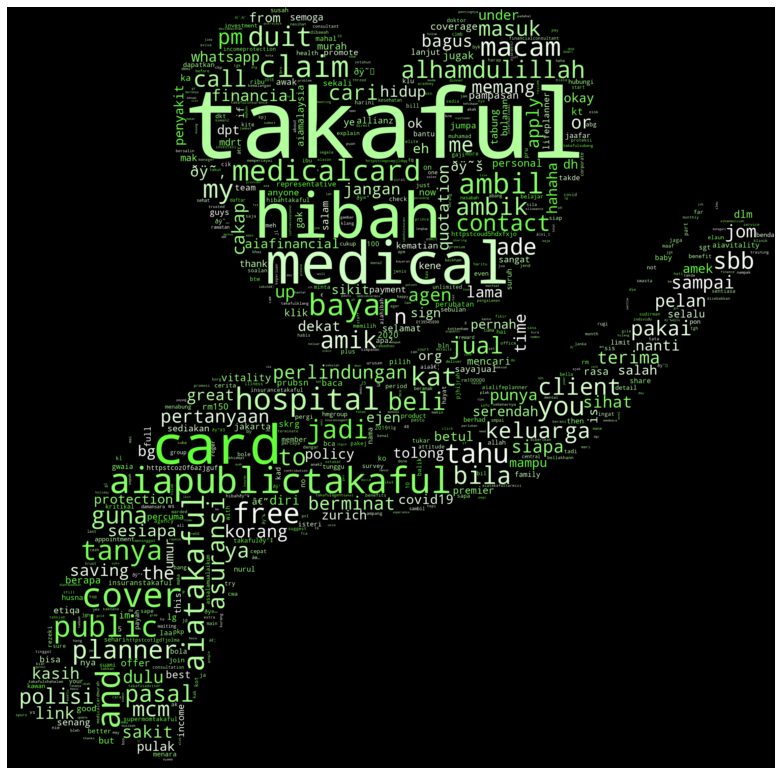

In [25]:
# split sentences to get individual words
all_words = []
for line in df['words']: # try 'tokens'
    all_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_words)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=2330,
                      height=2309,
                      max_words=700,
                      max_font_size=400,
                      background_color="rgb(0,0,0)",
                      mask=mask,
                      normalize_plurals=True).generate_from_frequencies(wordfreq)

plt.figure(figsize=(24,14))
plt.tight_layout(pad=0)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=random_color_func, random_state=3), interpolation='bilinear')
wordcloud.to_file("aia.png")
plt.show()

In [2]:
import plotly.graph_objects as go
import chart_studio.plotly as py
import plotly.graph_objects as go

labels = ['Positive','Neutral','Negatives']
values = [34194,38,13284]
my_colors = ['rgb(0, 128, 0)', 'rgb(255, 255, 0)', 'rgb(255, 0, 0)']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial', marker_colors=my_colors,
                             marker=dict(line=dict(color='#FFFFFF', width=2))
                            )])
fig.update_layout(
    autosize= False,
    width= 450,
    height= 400,
    plot_bgcolor= 'rgb(0,0,0)',
    paper_bgcolor= 'rgb(0,0,0)',
    font=dict(family="Arial",size=14, color="white"),    
    margin=dict(
        l=80,
        t=100
    ),
)

fig.show()

In [57]:
import chart_studio.plotly as py
py.plot(fig, filename = 'piecharts_aia', auto_open=True)

'https://plotly.com/~nananurfarhana42/30/'

In [50]:
import plotly.graph_objects as go
import chart_studio.plotly as py
import plotly.graph_objects as go

fig1 = go.Figure(go.Indicator(
    mode = "gauge",
    domain = {'x': [0, 1], 'y': [0, 1]},
    gauge = {
        'axis': {'range': [None, 5], 'tickwidth': 0, 'tickcolor': "white"},
        'bar': {'color': "darkblue", 'thickness':0},
        'bgcolor': "white",
        'borderwidth': 2,
        'bordercolor': "white",
        'steps': [
            {'range': [0, 1.4], 'color': 'red'},
            {'range': [1.4, 1.44], 'color': 'yellow'},
            {'range': [1.44, 5.0], 'color': 'green'}],
        'threshold': {
            'line': {'color': "black", 'width': 4},
            'thickness': 0.75,
            'value': 100}}))

fig1.update_layout(
            title={
            'text': "↑ 3.6/5.0 <br> Positive",
            'font': dict(family="Roboto",size=16, color="white"),
            'y':0.45,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'middle'},
                    autosize= False,
                    width= 300,
                    height= 160,
                    plot_bgcolor= 'rgb(0,0,0,0)',
                    paper_bgcolor= 'rgb(0,0,0,0)',
                    font=dict(family="Arial",size=14, color="white"),    
                    margin=dict(
                         l=20,
                         b=0,
                         t=0,
                         r=20
                  ),
)

fig1.show()


In [51]:
import chart_studio.plotly as py
py.plot(fig1, filename = 'gaugecharts_aia', auto_open=True)

'https://plotly.com/~nananurfarhana42/41/'